# Entity-Relation Extraction as Multi-turn Question Answering
# 实体-关系抽取作为多轮问答

# Abstract
# 摘要


In this paper, we propose a new paradigm for the task of entity-relation extraction. We cast the task as a multi-turn question answering problem, i.e., the extraction of entities and relations is transformed to the task of identifying answer spans from the context. This multi-turn QA formalization comes with several key advantages: firstly, the question query encodes important information for the entity/relation class we want to identify; secondly, QA provides a natural way of jointly modeling entity and relation; and thirdly, it allows us to exploit the well developed machine reading comprehension (MRC) models.

Experiments on the ACE and the CoNLL04 corpora demonstrate that the proposed paradigm significantly outperforms previous best models. We are able to obtain the state of-the-art results on all of the ACE04, ACE05 and CoNLL04 datasets, increasing the SOTA results on the three datasets to 49.4 (+1.0), 60.2 (+0.6) and 68.9 (+2.1), respectively.

Additionally, we construct a newly developed dataset RESUME in Chinese, which requires multi-step reasoning to construct entity dependencies, as opposed to the single-step dependency extraction in the triplet exaction in previous datasets. The proposed multi-turn QA model also achieves the best performance on the RESUME dataset.

本文提出了一种新的实体关系抽取方法。我们将任务转换为一个多回合的问题回答问题，即，实体和关系的提取被转化为从上下文中识别答案的任务。这种多轮QA形式化具有几个关键的优点:首先，问题查询为我们想要识别的实体/关系类编码重要信息;其次，QA提供了一种自然的方式为实体与关系的联合建模;第三，它使我们能够利用发展良好的机器阅读理解(MRC)模型。

在ACE和CoNLL04语料库上的实验表明，所提出的范例明显优于先前的最佳范例。我们能够获得所有ACE04、ACE05和CoNLL04数据集的最新结果，这三个数据集的SOTA结果分别为49.4(+1.0)、60.2(+0.6)和68.9(+2.1)。

此外，我们建构了一个新开发的中文资料库RESUME，它需要多步骤的推理来建构实体的相依性，而不是在以前的资料集中单一步骤的相依性萃取。所提出的多回合质量保证模型在RESUME数据集上也达到了最佳的性能。


# 1 Introduction
# 1 介绍

Identifying entities and their relations is the prerequisite of extracting structured knowledge from unstructured raw texts, which has recieved growing interest these years. Given a chunk of natural language text, the goal of entity-relation extraction is to transform it to a structural knowledge base. For example, given the following text:

识别实体及其关系是从非结构化的原始文本中提取结构化知识的前提，近年来人们对非结构化的原始文本越来越感兴趣。给定一组自然语言文本，实体-关系提取的目标是将其转换为结构化的知识库。例如，给定以下文本:

In 2002, Musk founded SpaceX, an aerospace manufacturer and space transport services Company, of which he is CEO and lead designer. He helped fund Tesla, Inc., an electric vehicle and solar panel manufacturer, in 2003, and became its CEO and product architect. In 2006, he inspired the creation of SolarCity, a solar energy services Company, and operates as its chairman. In 2016, he co-founded Neuralink, a neurotechnology Company focused on developing brain–computer interfaces, and is its CEO. In 2016, Musk founded The Boring Company, an infrastructure and tunnelconstruction Company.

2002年，马斯克创办了太空探索技术公司，这是一家航空制造和太空运输服务公司，他是该公司的首席执行官和首席设计师。2003年，他帮助资助了特斯拉公司(Tesla, Inc.)，一家电动汽车和太阳能电池板制造商，并成为其首席执行官和产品设计师。2006年，他创立了太阳能服务公司SolarCity，并担任董事长。2016年，他与人共同创立了Neuralink，这是一家专注于开发脑-机接口的神经技术公司，也是该公司的首席执行官。2016年，马斯克创立了一家基础设施和隧道建设公司——钻探公司。

We need to extract four different types of entities, i.e., Person, Company, Time and Position, and three types of relations, FOUND, FOUNDING-TIME and SERVING-ROLE. The text is to be transformed into a structural dataset shown in Table 1.

我们需要提取四种不同类型的实体，即三种关系:建立关系、建立时间关系和服务角色关系。文本将被转换为表1中所示的结构数据集。

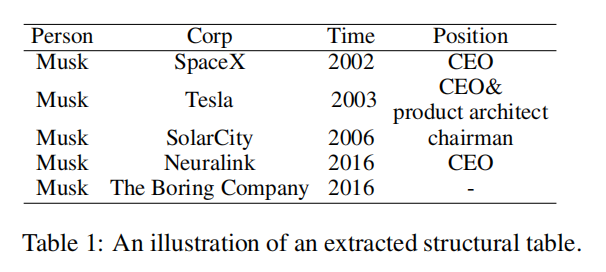


Most existing models approach this task by extracting a list of triples from the text, i.e., REL(e1, e2), which denotes that relation REL holds between entity e1 and entity e2. Previous models fall into two major categories: the pipelined approach, which first uses tagging models to identify entities, and then uses relation extraction models to identify the relation between each entity pair and the joint approach, which combines the entity model and the relation model throught different strategies, such as constraints or parameters sharing.

大多数现有的模型通过从文本中提取三元组列表来完成此任务，即， REL(e1, e2)，表示实体e1与实体e2之间存在REL关系。先前的模型分为两大类:流水线方法,首次使用标记模型识别实体,然后使用关系提取模型来识别每个实体之间的关系和联合的方法,结合实体模型和关系模型中通过不同的策略,如约束或参数共享。

There are several key issues with current approaches, both in terms of the task formalization and the algorithm. At the formalization level, the REL(e1, e2) triplet structure is not enough to fully express the data structure behind the text. Take the Musk case as an example, there is a hierarchical dependency between the tags: the extraction of Time depends on Position since a Person can hold multiple Positions in a Company during different Time periods. The extraction of Position also depends on Company since a Person can work for multiple companies. At the algorithm level, for most existing relation extraction models the input to the model is a raw sentence with two marked mentions, and the output is whether a relation holds between the two mentions. As pointed out in Wang et al; Zeng et al, it is hard for neural models to capture all the lexical, semantic and syntactic cues in this formalization, especially when (1) entities are far away; (2) one entity is involved in multiple triplets; or (3) relation spans have overlaps.

当前的方法在任务形式化和算法方面存在几个关键问题。在形式化级别，REL(e1, e2)三元组结构不足以完全表达文本背后的数据结构。以Musk为例，标签之间存在层次依赖关系:时间的提取依赖于位置，因为一个人可以在不同的时间段里担任一个公司的多个职位。职位的选择也取决于公司，因为一个人可以在多家公司工作。在算法层面，对于大多数现有的关系提取模型，模型的输入是两个标记提及的原始语句，输出是两个提及之间是否存在关系。正如Wang等人所指出的;Zeng等人认为，在这种形式化过程中，神经模型很难捕捉到所有的词汇、语义和句法线索，特别是当(1)实体距离较远的时候;(2)一个实体涉及多个三元组;(3)关系跨越有重叠。

In the paper, we propose a new paradigm to handle the task of entity-relation extraction. We formalize the task as a multi-turn question answering task: each entity type and relation type is characterized by a question answering template, and entities and relations are extracted by answering template questions. Answers are text spans, extracted using the now standard machine reading comprehension (MRC) framework: predicting answer spans given context. To extract structural data like Table 1, the model need to answer the following questions sequentially:

在本文中，我们提出了一种处理实体-关系抽取任务的新范式。我们将该任务形式化为多轮问答任务:每个实体类型和关系类型都有一个问答模板，通过问答模板问题提取实体和关系。答案是文本范围，使用现在标准的机器阅读理解(MRC)框架提取:根据上下文预测答案范围。为了提取如表1所示的结构数据，模型需要依次回答以下问题:

• Q: who is mentioned in the text? A: Musk; 
• Q: which Company / companies did Muskwork for? A: SpaceX, Tesla, SolarCity, Neuralink and The Boring Company; 
• Q: when did Musk join SpaceX? A: 2002; 
• Q: what was Musk’s Position in SpaceX? A: CEO.

•问:文中提到了谁?答:马斯克;
•问:马斯克为哪家公司工作?答:SpaceX、特斯拉(Tesla)、太阳城(SolarCity)、Neuralink和The Boring Company;
•问:马斯克是什么时候加入SpaceX的?答:2002;
•问:马斯克在SpaceX的位置是什么?答:CEO。

Treating the entity-relation extraction task as a multi-turn QA task has the following key advantages: (1) the multi-turn QA setting provides an elegant way to capture the hierarchical dependency of tags. As the multi-turn QA proceeds, we progressively obtain the entities we need for the next turn. This is closely akin to the multi-turn slot filling dialogue system ; (2) the question query encodes important prior information for the relation class we want to identify. This informativeness can potentially solve the issues that existing relation extraction models fail to solve, such as distantlyseparated entity pairs, relation span overlap, etc; (3) the QA framework provides a natural way to simultaneously extract entities and relations: most MRC models support outputting special NONE tokens, indicating that there is no answer to the question. Throught this, the original two tasks, entity extraction and relation extraction can be merged to a single QA task: a relation holds if the returned answer to the question corresponding to that relation is not NONE, and this returned answer is the entity that we wish to extract.

将实体-关系提取任务视为多轮QA任务具有以下主要优点:(1)多轮QA设置为捕获标记的层次依赖关系提供了一种优雅的方法。随着多回合QA的进行，我们将逐步获得下一轮所需的实体。这与多回合槽位填充对话系统非常相似;(2)问题查询为我们要识别的关系类编码重要的先验信息。这种信息性可以潜在地解决现有关系抽取模型不能解决的问题，如分离实体对、关系广度重叠等;(3) QA框架为同时提取实体和关系提供了一种自然的方式:大多数MRC模型支持输出特殊的NONE tokens，表示没有问题的答案。通过这一点，原来的两个任务，实体提取和关系提取可以合并到一个QA任务中:如果关系对应的问题的返回答案不是NONE，则关系保持不变，而这个返回的答案就是我们希望提取的实体。

In this paper, we show that the proposed paradigm, which transforms the entity-relation extraction task to a multi-turn QA task, introduces significant performance boost over existing systems. It achieves state-of-the-art (SOTA) performance on the ACE and the CoNLL04 datasets. The tasks on these datasets are formalized as triplet extraction problems, in which two turns of QA suffice. We thus build a more complicated and more difficult dataset called RESUME which requires to extract biographical information of individuals from raw texts. The construction of structural knowledge base from RESUME requires four or five turns of QA. We also show that this multi-turn QA setting could easilty integrate reinforcement learning (just as in multi-turn dialog systems) to gain additional performance boost.

在本文中，我们证明了所提出的范例，它将实体-关系抽取任务转换成多回合的QA任务，在现有系统的基础上引入了显著的性能提升。它在ACE和CoNLL04数据集上实现了最先进的(SOTA)性能。这些数据集上的任务被形式化为三元组抽取问题，其中两轮QA就足够了。因此，我们建立了一个更复杂和更困难的数据集称为RESUME，它需要从原始文本中提取个人的传记信息。从RESUME构建结构化的知识库需要四到五次QA。我们还表明，这种多轮QA设置可以很容易地集成强化学习(就像在多轮对话系统中一样)，以获得额外的性能提升。

The rest of this paper is organized as follows: Section 2 details related work. We describe the dataset and setting in Section 3, the proposed model in Section 4, and experimental results in Section 5. We conclude this paper in Section 6.

本文的其余部分组织如下:第二节详细介绍了相关工作。我们在第3节中描述了数据集和设置，在第4节中描述了提出的模型，在第5节中描述了实验结果。我们在第6节对本文进行了总结。

# 2  Related Work
# 2 相关工作

## 2.1 Extracting Entities and Relations
## 2.1 提取实体和关系

Many earlier entity-relation extraction systems are pipelined: an entity extraction model first identifies entities of interest and a relation extraction model then constructs relations between the extracted entities. Although pipelined systems has the flexibility of integrating different data sources and learning algorithms, they suffer significantly from error propagation.

许多早期的实体-关系提取系统都是流水线的:实体提取模型首先识别感兴趣的实体，然后关系提取模型构建被提取实体之间的关系。尽管流水线系统可以灵活地集成不同的数据源和学习算法，但是它们会受到错误传播的严重影响。

To tackle this issue, joint learning models have been proposed. Earlier joint learning approaches connect the two models through various dependencies, including constraints solved by integer linear programming , card-pyramid parsing , and global probabilistic graphical models. In later studies, Li and Ji extract entity mentions and relations using structured perceptron with efficient beam-search, which is significantly more efficient and less Time-consuming than constraintbased approaches. Miwa and Sasaki; Gupta et al; Zhang et al. proposed the table-filling approach, which provides an opportunity to incorporating more sophisticated features and algorithms into the model, such as search orders in decoding and global features. Neural network models have been widely used in the literature as well. Miwa and Bansal introduced an end-to-end approach that extract entities and their relations using neural network models with shared parameters, i.e., extracting entities using a neural tagging model and extracting relations using a neural multiclass classification model based on tree LSTMs. Wang et al.  extract relations using multi-level attention CNNs. Zeng et al. proposed a new framework that uses sequence-to-sequence models to generate entityrelation triples, naturally combining entity detection and relation detection.

为了解决这一问题，提出了联合学习模型。早期的联合学习方法通过各种依赖关系将这两个模型连接起来，包括用整数线性规划、卡片金字塔解析和全局概率图形模型解决的约束。在后来的研究中，Li和Ji使用结构化感知器和有效的波束搜索来提取实体提及和关系，这明显比基于约束的方法更有效，更省时。古板和佐佐木;古普塔等;Zhang等人提出了表格填充方法，该方法提供了将更复杂的特征和算法合并到模型中的机会，例如解码中的搜索顺序和全局特征。神经网络模型在文献中也得到了广泛的应用。Miwa和Bansal介绍了一种端到端的方法，该方法使用具有共享参数的神经网络模型来提取实体及其关系。，使用神经标记模型提取实体，使用基于树LSTMs的神经多类分类模型提取关系。Wang等人使用多级注意力CNNs提取关系。Zeng等人提出了一个新的框架，利用序列到序列的模型来生成实体关系三元组，将实体检测与关系检测自然地结合起来。

Another way to bind the entity and the relation extraction models is to use reinforcement learning or Minimum Risk Training, in which the training signals are given based on the joint decision by the two models. Sun et al. optimized a global loss function to jointly train the two models under the framework work of Minimum Risk Training. Takanobu et al. used hierarchical reinforcement learning to extract entities and relations in a hierarchical manner.

另一种将实体和关系提取模型进行绑定的方法是采用强化学习或最小风险训练，其中训练信号是基于两个模型的联合决策给出的。Sun等人优化了全局损失函数，在最小风险训练框架下联合训练两个模型。Takanobu等人采用分层强化学习的方法，以分层的方式提取实体和关系。

## 2.2 Machine Reading Comprehension
## 2.2 机器阅读理解


Main-stream MRC models extract text spans in passages given queries. Text span extraction can be simplified to two multiclass classification tasks, i.e., predicting the starting and the ending positions of the answer. Similar strategy can be extended to multi-passage MRC where the answer needs to be selected from multiple passages. Multi-passage MRC tasks can be easily simplified to single-passage MRC tasks by concatenating passages. Wang et al.first rank the passages and then run single-passage MRC on the selected passage. Tan et al. train the passage ranking model jointly with the reading comprehension model. Pretraining methods like BERT or Elmo have proved to be extremely helpful in MRC tasks.

主流的MRC模型提取给定查询段落中的文本跨度。文本跨度提取可以简化为两个多类分类任务，即，预测答案的起始位置和结束位置。类似的策略可以扩展到多篇MRC，其中答案需要从多篇文章中选择。通过将多通道的MRC任务串联起来，可以很容易地将其简化为单通道的MRC任务。Wang等人先对文章进行排序，然后在选定的文章上运行单段MRC。Tan等人将文章排名模型与阅读理解模型联合训练。像BERT或Elmo这样的训练前方法已经被证明对MRC任务非常有帮助。

There has been a tendency of casting non-QA NLP tasks as QA tasks. Our work is highly inspired by Levy et al. Levy et al.  and McCann et al. focus on identifying the relation between two pre-defined entities and the authors formalize the task of relation extraction as a single-turn QA task. In the current paper we study a more complicated scenario, where hierarchical tag dependency needs to be modeled and single-turn QA approach no longer suffices. We show that our multi-turn QA method is able to solve this challenge and obtain new state-of-the-art results.

有将非QA NLP任务转换为QA任务的趋势。我们的工作深受列维等人的启发。Levy等人和McCann等人专注于识别两个预定义实体之间的关系，并将关系提取任务形式化为单轮QA任务。在本文中，我们研究了一个更复杂的场景，其中需要对分层标签依赖关系进行建模，单轮QA方法不再适用。我们证明，我们的多回合质量保证方法能够解决这一挑战，并获得新的最先进的结果。









# 3 Datasets and Tasks
# 3 数据集和任务

## 3.1 ACE04, ACE05 and CoNLL04

We use ACE04, ACE05 and CoNLL04, the widely used entity-relation extraction benchmarks for evaluation. ACE04 defines 7 entity types, including Person (PER), Organization (ORG), Geographical Entities (GPE), Location (loc), Facility (FAC), Weapon (WEA) and Vehicle (VEH). For each pair of entities, it defines 7 relation categories, including Physical (PHYS), Person-Social (PER-SOC), EmploymentOrganization (EMP-ORG), Agent-Artifact (ART), PER/ORG Affiliation (OTHER-AFF), GPE- Affiliation (GPE-AFF) and Discourse (DISC). ACE05 was built upon ACE04. It kept the PER-SOC, ART and GPE-AFF categories from ACE04 but split PHYS into PHYS and a new relation category PARTWHOLE. It also deleted DISC and merged EMPORG and OTHER-AFF into a new category EMPORG. As for CoNLL04, it defines four entity types (LOC, ORG, PERand OTHERS) and five relation categories (LOCATED_IN, WORK_FOR, ORGBASED_IN, LIVE_IN ]and KILL).

我们使用ACE04、ACE05和CoNLL04这三个广泛使用的实体关系提取基准进行评估。ACE04定义了7种实体类型，包括人员(PER)、组织(ORG)、地理实体(GPE)、位置(loc)、设施(FAC)、武器(WEA)和车辆(VEH)。对于每一对实体，它定义了7个关系类别，包括物理(PHYS)、人-社会(PER- soc)、就业组织(EMP-ORG)、代理-工件(ART)、PER/ORG从属关系(OTHER-AFF)、GPE-从属关系(GPE- aff)和话语(DISC)。ACE05是在ACE04的基础上构建的。它保留了来自ACE04的PER-SOC、ART和GPE-AFF类别，但将PHYS分成了PHYS和一个新的关系类别PARTWHOLE。它还删除了光盘和合并EMPORG和其他aff到一个新的类别EMPORG。至于CoNLL04，它定义了四种实体类型(LOC、ORG、PERand和其他类型)和五种关系类别(LOCATED_IN、WORK_FOR、ORGBASED_IN、LIVE_IN]和KILL)。

For ACE04 and ACE05, we followed the training/dev/test split in Li and Ji and Miwa and Bansal. For the CoNLL04 dataset, we followed Miwa and Sasaki.

对于ACE04和ACE05，我们跟踪了Li和Ji、Miwa和Bansal的训练/开发/测试。对于CoNLL04数据集，我们跟踪了Miwa和Sasaki。

## 3.2 RESUME: A newly constructed dataset
## 3.2 RESUME: 新建的数据集

The ACE and the CoNLL-04 datasets are intended for triplet extraction, and two turns of QA is sufficient to extract the triplet (one turn for head-entities and another for joint extraction of tail-entities and relations). These datasets do not involve hierarchical entity relations as in our previous Musk example, which are prevalent in real life applications. Therefore, we construct a new dataset called RESUME. We extracted 841 paragraphs from chapters describing management teams in IPO prospectuses. Each paragraph describes some work history of an executive. We wish to extract the structural data from the resume. The dataset is in Chinese. The following shows an examples:

ACE和CoNLL-04数据集用于三重提取，两次QA足以提取三重(一次用于头部实体，另一次用于尾部实体和关系的联合提取)。这些数据集不涉及层次实体关系，在我们之前的马斯克例子，这是普遍存在于现实生活中的应用。因此，我们构建了一个新的数据集，称为RESUME。我们从IPO招股说明书中描述管理团队的章节中摘录了841段。每一段都描述了一位主管的工作经历。我们希望从简历中提取结构数据。数据集是中文的。以下是一个例子:

郑强先生，本公司监事，1973年出生，中 国国籍，无境外永久居留权。1995年，毕业 于南京大学经济管理专业；1995年至1998年， 就职于江苏常州公路运输有限公司，任主办 会计；1998年至2000年，就职于越秀会计师事务所，任项目经理；2000年至2010年，就职于国富浩华会计师事务所有限公司广东分所， 历任项目经理、部门经理、合伙人及副主任会计师；2010年至2011年，就职于广东中科 招商创业投资管理有限责任公司，任副总经 理；2011年至今，任广东中广投资管理有限公 司董事、总经理；2016年至今，任湛江中广创 业投资有限公司董事、总经理；2016年3月至 今，担任本公司监事.

Mr. Zheng Qiang, a supervisor of the Company. He was born in 1973. His nationality is Chinese with no permanent residency abroad. He graduated from Nanjing University with a major in economic management in 1995. From 1995 to 1998, he worked for Jiangsu Changzhou Road Transportation Co., Ltd. as an organizer of accounting. From 1998 to 2000, he worked as a project manager in Yuexiu Certified Public Accountants. In 2010, he worked in the Guangdong branch of Guofu Haohua Certified Public Accountants Co., Ltd., and served as a project manager, department manager, partner and deputy chief accountant. From 2010 to 2011, he worked for Guangdong Zhongke Investment Venture Capital Management Co., Ltd. as a deputy general manager; since 2011, he has served as thedirector and general manager of Guangdong Zhongguang Investment Management Co., Ltd.; since 2016, he has served as director and general manager of Zhanjiang Zhongguang Venture Capital Co., Ltd.; since March 2016, he has served as the supervisor of the Company.

We identify four types of entities: Person (the name of the executive), Company (the company that the executive works/worked for), Position (the position that he/she holds/held) and Time (the time period that the executive occupies/occupied that position). It is worth noting that one person can work for different companies during different periods of time and that one person can hold different positions in different periods of time for the same company.

我们确定了四种类型的实体:人员(执行人员的姓名)、公司(执行人员工作/工作的公司)、职位(他/她担任的职位)和时间(执行人员担任该职位的时间)。值得注意的是，一个人可以在不同的时间为不同的公司工作，一个人可以在不同的时间为同一家公司担任不同的职位。

We recruited crowdworkers to fill the slots in Table 1. Each passage is labeled by two different crowdworkers. If labels from the two annotators disagree, one or more annotators were asked to label the sentence and a majority vote was taken as the final decision. Since the wording of the text is usually very explicit and formal, the interagreement between annotators is very high, achieving a value of 93.5% for all slots. Some statistics of the dataset are shown in Table 2. We randomly split the dataset into training (80%), validation(10%) and test set (10%).

我们招募了一些群众工作者来填补表1中的空缺。每一段都由两名不同的群众工作者标注。如果两名注释者的标注不一致，则要求一名或多名注释者对句子进行标注，并以多数票通过为最终决定。由于文本的措辞通常非常明确和正式，注释者之间的协议非常高，所有槽的值为93.5%。数据集的一些统计数据如表2所示。我们将数据集随机分为训练集(80%)、验证集(10%)和测试集(10%)。

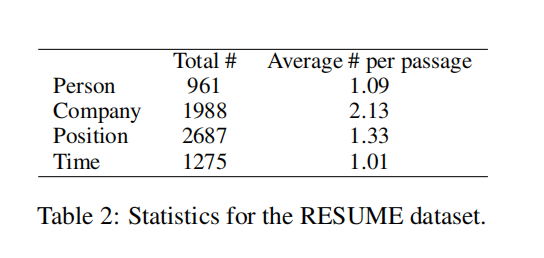


# 4 Model
# 4 模型
## 4.1 System Overview
## 4.1 系统综述

The overview of the algorithm is shown in Algorithm 1. The algorithm contains two stages:

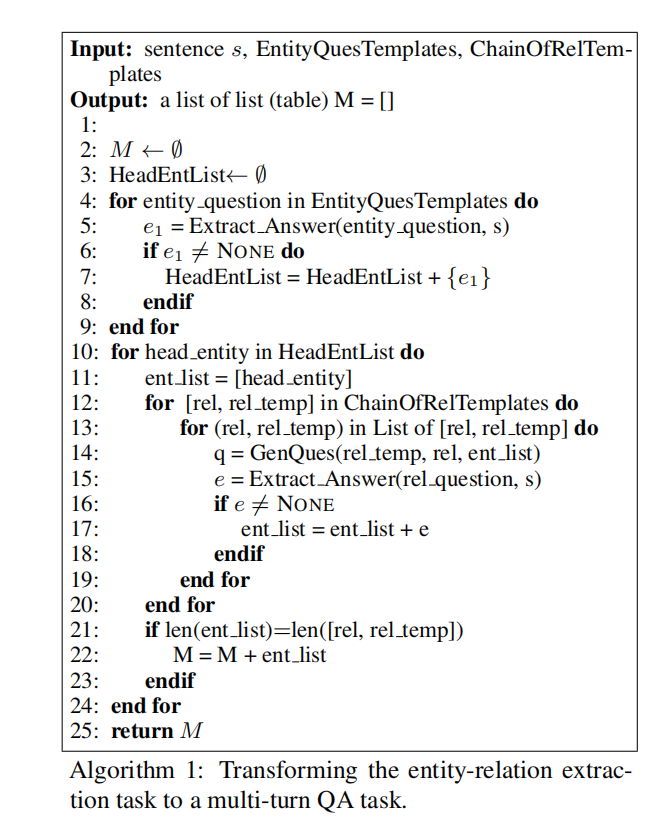

算法概述如算法1所示。算法分为两个阶段:

(1) The head-entity extraction stage (line 4-9): each episode of multi-turn QA is triggered by an entity. To extract this starting entity, we transform each entity type to a question using EntityQuesTemplates (line 4) and the entity e is extracted by answering the question (line 5). If the system outputs the special NONE token, then it means s does not contain any entity of that type.

(1)头部-实体提取阶段(第4-9行):多回合QA的每一集由一个实体触发。提取这个实体开始,我们将每个实体类型的问题使用EntityQuesTemplates(第4行)和实体e提取通过回答问题(第5行)。如果系统输出 NONE token,那么这意味着句子不包含任何实体的类型。

(2) The relation and the tail-entity extraction stage (line 10-24): ChainOfRelTemplates defines a chain of relations, the order of which we need to follow to run multi-turn QA. The reason is that the extraction of some entities depends on the extraction of others. For example, in the RESUME dataset, the position held by an executive relies on the company he works for. Also the extraction of the Time entity relies on the extraction of both the Company and the Position. The extraction order is manually pre-defined. ChainOfRelTemplates also defines the template for each relation. Each template contains some slots to be filled. To generate a question (line 14), we insert previously extracted entity/entities to the slot/slots in a template. The relation REL and tail-entity e will be jointly extracted by answering the generated question (line 15). A returned NONE token indicates that there is no answer in the given sentence.

(2)关系和尾部实体提取阶段(第10-24行):ChainOfRelTemplates定义了一个关系链，我们需要按照这个关系链的顺序来运行多轮QA。原因是，某些实体的提取依赖于其他实体的提取。例如，在RESUME数据集中，高管的职位取决于他所在的公司，时间实体的提取依赖于公司和职位的提取。提取顺序是手动预先定义的。ChainOfRelTemplates还为每个关系定义了模板。每个模板都包含一些要填充的槽位。为了生成一个问题(第14行)，我们将之前提取的实体/实体插入到模板中的slot/slot中。通过回答生成的问题(第15行)，将联合提取REL和tail-entity e关系。返回的NONE token表示在给定的句子中没有应答。

It is worth noting that entities extracted from the head-entity extraction stage may not all be head entities. In the subsequent relation and tail-entity extraction stage, extracted entities from the first stage are initially assumed to be head entities, and are fed to the templates to generate questions. If an entity e extracted from the first stage is indeed a head-entity of a relation, then the QA model will extract the tail-entity by answering the corresponding question. Otherwise, the answer will be NONE and thus ignored.

值得注意的是，从head-entity提取阶段提取的实体不一定都是head实体。在随后的关系和尾部实体提取阶段，从第一个阶段提取的实体最初被假定为头部实体，并被提供给模板以生成问题。如果从第一阶段提取的实体e确实是关系的头实体，那么QA模型将通过回答相应的问题来提取尾实体。否则，答案将是NONE，因此被忽略。

For ACE04, ACE05 and CoNLL04 datasets, only two QA turns are needed. ChainOfRelTemplates thus only contain chains of 1. For RESUME, we need to extract 4 entities, so ChainOfRelTemplates contain chains of 3.

对于ACE04、ACE05和CoNLL04数据集，只需要两个QA循环。ChainOfRelTemplates因此只包含1个链。对于RESUME，我们需要提取4个实体，所以ChainOfRelTemplates包含3个实体。

## 4.2 Generating Questions using Templates
## 4.2 使用模板生成问题

Each entity type is associated with a type-specific question generated by the templates. There are two ways to generate questions based on templates: natural language questions or pseudo-questions. A pseudo-question is not necessarily grammatical. For example, the natural language question for the Facility type could be Which facility is mentioned in the text, and the pseudo-question could just be entity: facility.

每个实体类型都与模板生成的特定类型问题相关联。基于模板生成问题有两种方法:自然语言问题或伪问题。伪疑问句不一定符合语法规则。例如，设施类型的自然语言问题可以是文本中提到的设施，而伪问题可以是实体:设施。

At the relation and the tail-entity joint extraction stage, a question is generated by combing a relation-specific template with the extracted headentity. The question could be either a natural language question or a pseudo-question. Examples are shown in Table 3 and Table 4.

在关系和尾实体联合提取阶段，将关系特定的模板与提取的头实体结合起来产生一个问题。这个问题可以是一个自然语言问题，也可以是一个伪问题。示例如表3和表4所示。

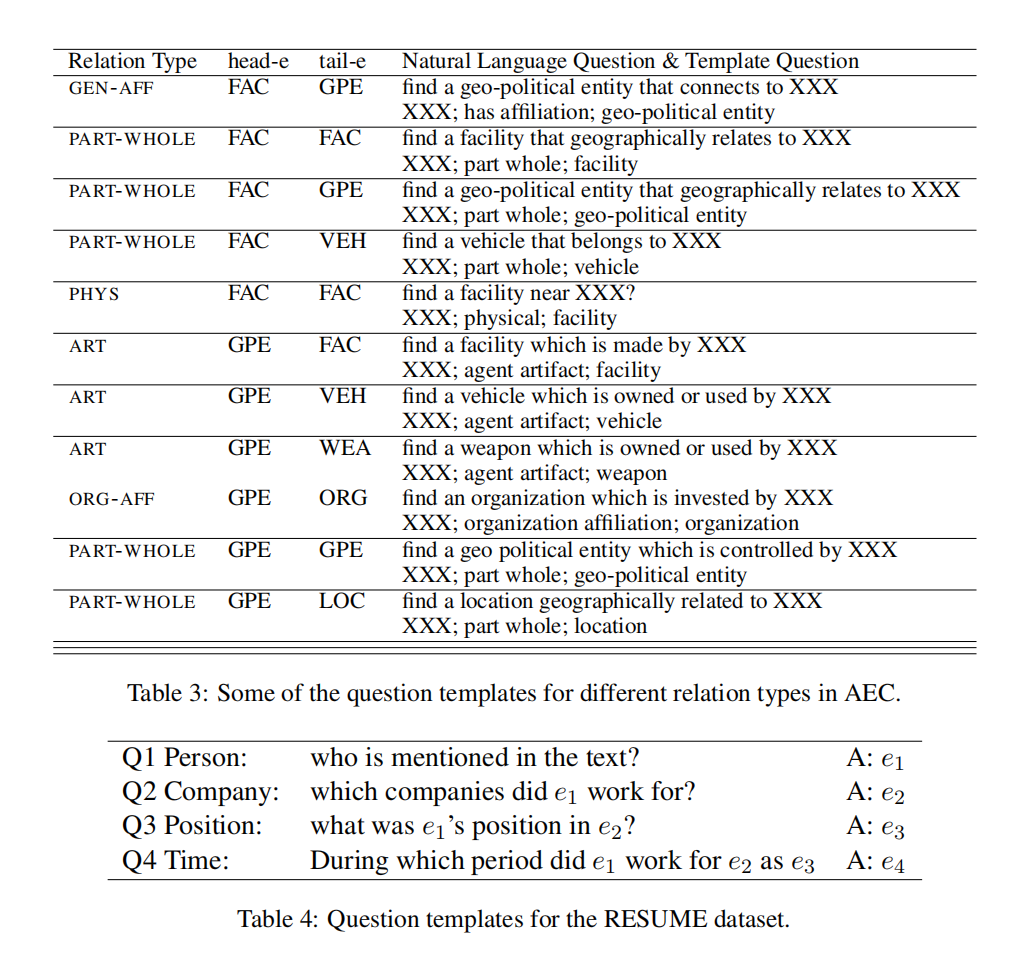


## 4.3 Extracting Answer Spans via MRC
## 4.3 通过MRC提取答案跨度

Various MRC models have been proposed, such as BiDAF and QANet . In the standard MRC setting, given a question Q = {q1, q2, ..., qNq } where Nq denotes the number of words in Q, and context C = {c1, c2, ..., cNc }, where Nc denotes the number of words in C, we need to predict the answer span. For the QA framework, we use BERT as a backbone. BERT performs bidirectional language model pretraining on largescale datasets using transformers and achieves SOTA results on MRC datasets like SQUAD. To align with the BERT framework, the question Q and the context C are combined by concatenating the list [CLS, Q, SEP, C, SEP], where CLS and SEP are special tokens, Q is the tokenized question and C is the context. The representation of each context token is obtained using multi-layer transformers.

已经提出了各种MRC模型，如BiDAF和QANet。在标准的MRC设置中，给定一个问题Q = {q1, q2，…qn}其中，Nq表示Q中的字数，上下文C = {c1, c2，…cn}，其中Nc表示C中的字数，我们需要预测答案跨度。对于QA框架，我们使用BERT作为骨干。BERT使用transformer对大规模数据集进行双向语言模型预处理，并在MRC数据集(如SQUAD)上实现SOTA结果。为了与BERT框架保持一致，问题Q和上下文C通过连接列表[CLS, Q, SEP, C, SEP]来组合，其中CLS和SEP是特殊的标记，Q是标记化的问题，C是上下文。每个上下文token的表示是使用多层 transformers 获得的。

Traditional MRC models predict the starting and ending indices by applying two softmax layers to the context tokens. This softmax-based span extraction strategy only fits for single-answer extraction tasks, but not for our task, since one sentence/passage in our setting might contain multiple answers. To tackle this issue, we formalize the task as a query-based tagging problem. Specially, we predict a BMEO (beginning, inside, ending and outside) label for each token in the context given the query. The representation of each word is fed to a softmax layer to output a BMEO label. One can think that we are transforming two Nclass classification tasks of predicting the starting and the ending indices (where N denotes the length of sentence) to N 5-class classification tasks.

传统的MRC模型通过对上下文标记应用两个softmax层来预测起始和结束索引。这种基于softmax的跨度提取策略只适用于单个答案提取任务，但不适用于我们的任务，因为在我们的设置中一个句子/段落可能包含多个答案。为了解决这个问题，我们将任务形式化为一个基于查询的标记问题。特别地，我们为给定查询的上下文中的每个token预测一个BMEO(开始、内部、结束和外部)标签。每个单词的表示形式被提供给一个softmax层来输出一个BMEO标签。可以认为，我们正在将预测起始和结束索引(其中N表示句子长度)的两个Nclass分类任务转换为N个5类分类任务.

Training and Test At the training time, we jointly train the objectives for the two stages:

L = (1 1 λ)L(head-entity) + λL(tail-entity, rel)

λ ∈ [0, 1] is the parameter controling the trade-off between the two objectives. Its value is tuned on the validation set. Both the two models are initialized using the standard BERT model and they share parameters during the training. At test time, head-entities and tail-entities are extracted separately based on the two objectives.

在训练的时候，我们共同训练了两个阶段的目标:

L = (1 1 λ)L(head-entity) + λL(tail-entity, rel)

λ∈[0,1]参数控制两个目标之间的权衡。它的值在验证集上进行调优。两个模型都使用标准的BERT模型进行初始化，并且在训练期间共享参数。在测试时，根据这两个目标分别提取头实体和尾实体。


## 4.4 Reinforcement Learning
## 4.4 强化学习

Note that in our setting, the extracted answer from one turn not only affects its own accuracy, but also determines how a question will be constructed for the downstream turns, which in turn affect later accuracies. We decide to use reinforcement learning to tackle it, which has been proved to be successful in multi-turn dialogue generation, a task that has the same challenge as ours.

请注意，在我们的设置中，从一个回合中提取的答案不仅影响它自己的准确性，而且还决定了一个问题将如何构建为下游回合，这反过来又影响到以后的准确性。我们决定使用强化学习来解决它，这已经被证明是成功的多回合对话生成，这是一个具有相同挑战的任务。

Action and Policy In a RL setting, we need to define action and policy. In the multi-turn QA setting, the action is selecting a text span in each turn. The policy defines the probability of selecting a certain span given the question and the context. As the algorithm relies on the BMEO tagging output, the probability of selecting a certain span {w1, w2, ..., wn} is the joint probability of w1 being assigned to B (beginning), w2, ..., wn-1 being assigned to M (inside) and wn being assigned to E (end), written as follows:

在RL设置中，我们需要定义操作和策略。在多回合QA设置中，操作是在每个回合中选择一个文本范围。策略定义了给定问题和上下文选择特定范围的概率。由于该算法依赖于BMEO标记输出，所以选择某个span {w1, w2，…， wn}为w1分配给B(开始)，w2，…的联合概率。， wnn1赋值给M (inside)， wn赋值给E (end)，写成:

p(y(w1, ..., wn) = answer|question, s) = p(w1 = B) × p(wn = E) Yi∈[2,nn1] p(wi = M)

Reward For a given sentence s, we use the number of correctly retrieved triples as rewards. We use the REINFORCE algorithm, a kind of policy gradient method, to find the optimal policy, which maximizes the expected reward Eπ[R(w)]. The expectation is approximated by sampling from the policy π and the gradient is computed using the likelihood ratio:

对于给定的句子，我们使用正确检索到的三元组的数量作为奖励。我们使用增强算法,梯度法的一种政策,找到最优政策,最大化期望的奖励Eπ[R (w)]。从政策π近似期望抽样和使用似然比的计算梯度:

∇E(θ) ≈ [R(w) )-b]∇ log π(y(w)|question s))

where b denotes a baseline value. For each turn in the multi-turn QA setting, getting an answer correct leads to a reward of +1 . The final reward is the accumulative reward of all turns. The baseline value is set to the average of all previous rewards. We do not initialize policy networks from scratch, but use the pre-trained head-entity and tail-entity extraction model described in the previous section. We also use the experience replay strategy: for each batch, half of the examples are simulated and the other half is randomly selected from previously generated examples.

其中b表示基线值。在多回合的QA设置中，每轮答对一次，奖励为+1。最后的奖励是所有回合的累计奖励。基线值设置为之前所有奖励的平均值。我们不从头开始初始化策略网络，而是使用前一节中描述的预先训练的头-实体和尾-实体提取模型。我们还使用了经验回放策略:对于每个批处理，一半的示例是模拟的，另一半是从先前生成的示例中随机选择的。


For the RESUME dataset, we use the strategy of curriculum learning, i.e., we gradually increase the number of turns from 2 to 4 at training.

对于RESUME数据集，我们采用课程学习策略，即在训练中，我们逐渐增加转弯次数，从2次增加到4次。


# 5 实验结果








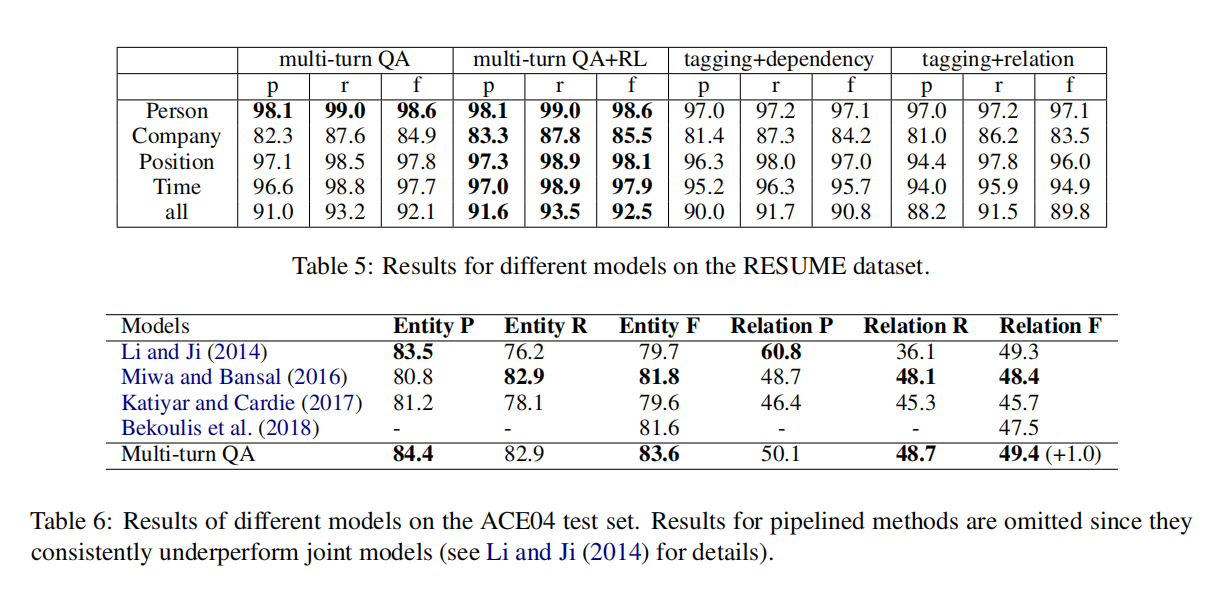

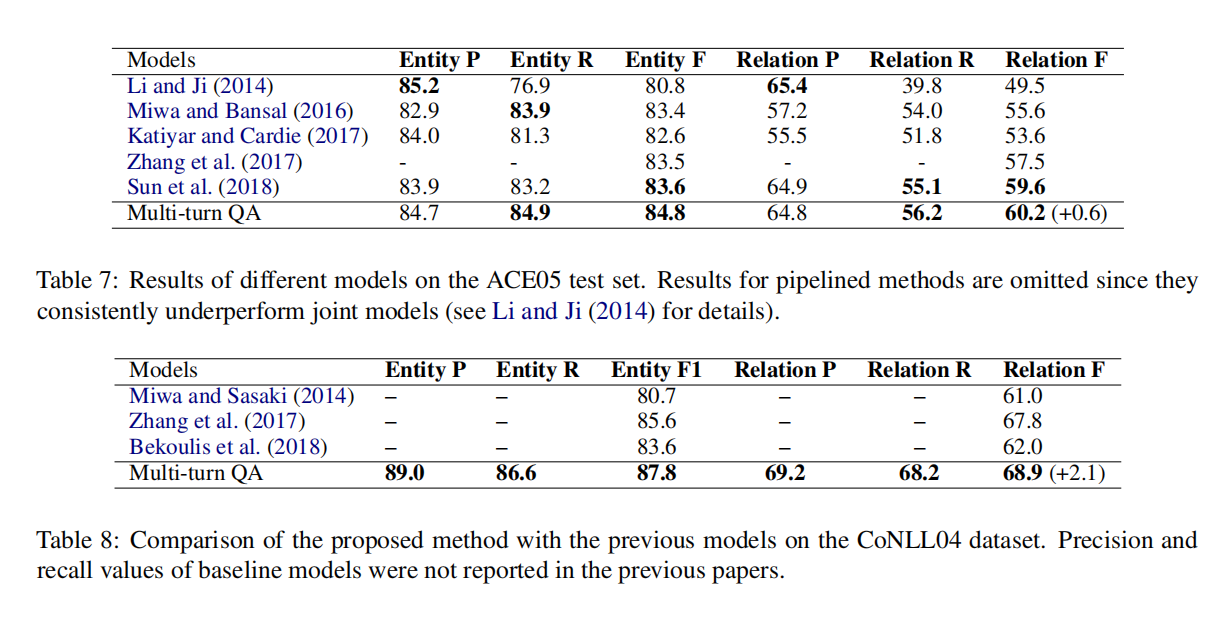



